<a href="https://colab.research.google.com/github/hws2002/Time_Series_Forecasting_in_Python/blob/main/simulation/simulation_ARMA_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARMA(1,1)프로세스를 시뮬레이션해보자.  
이는 MA(1)프로세스와 AR(1)프로세스를 조합한 것과 같다.  
여기서 상수 C와 평균 $\mu$는 모두 0으로 설정하고 다음과 같이 정의된 ARMA(1,1)프로세스를 시뮬레이션해보자.  
$y_t = 0.33y_{t-1} + 0.9\epsilon_{t-1} + \epsilon_t$  

이번 시뮬레이션의 목적은 ARMA(p,q)프로세스의 차수 q를 식별하기 위해 ACF도식을 사용할 수 없고, ARMA(p,q)프로세스의 차수 p를 식별하기 위해 PACF 도식을 사용할 수 없음을 입증하는 것이다.  

## !
`statsmodels` 라이브러리에서 ArmaProcess함수를 사용하여 ARMA(1,1) 프로세스를 시뮬레이션 할 것이다. 이 때 자기회구과정의 계수 부호를 반대로 입력해야 하는 것에 유의하자.   
그리고 계수 배열을 지정할떄 첫 번째 계수는 1이며 ,이는 지연 0에서의 계수를 나타낸다.

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(42)

ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])
arma_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample = 1000)

먼저 프로세스가 정상적 상태인지를 확인해보자.

In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF_test = adfuller(arma_1_1)
ADF_test

(-6.429878682042695,
 1.707846668009654e-08,
 20,
 979,
 {'1%': -3.4370471695043037,
  '5%': -2.8644967585264784,
  '10%': -2.5683443301882956},
 2760.1171729466205)

ARMA(1,1)프로세스는 정상적이라는 결론을 내릴 수 있다>  
그럼 이제 ACF를 도식화하고 ARMA(1,1)프로세스의 이동평균 부분의 차수를 유추할 수 있는지 확인해보자.  


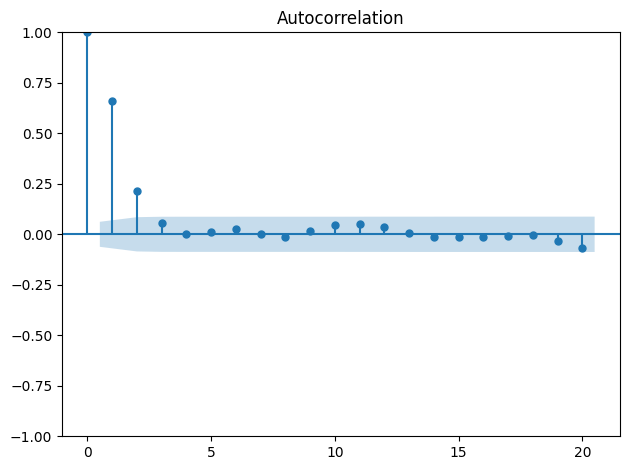

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(arma_1_1, lags = 20)
plt.tight_layout()

도식에서 사인 곡선 패턴을 확인할 수 있는데, 이는 자기회귀과정이 있음을 나타낸다.  또한 마지막으로 유의한 계수가 지연 2에 존재하므로 q=2라고 추론할 수 있다.  하지만 ARMA(1,1)프로세스를 시뮬레이션했으므로 q는 1이어야 한다.    
따라서 ACF도식을 사용하여 ARMA(p,q)프로세스의 차수 q를 추론할 수는 없다.

이제 PACF함수를 도식화해보자

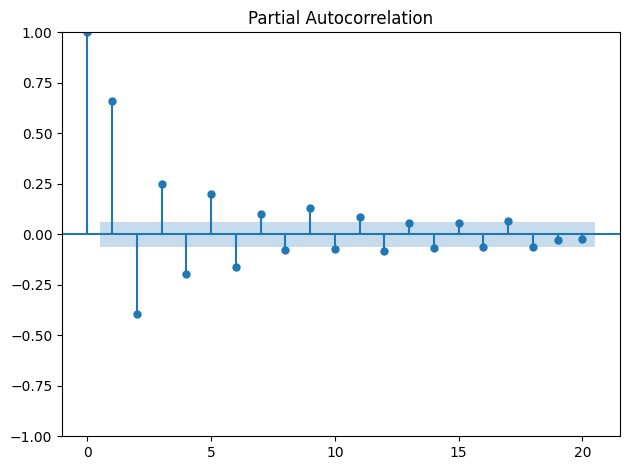

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(arma_1_1, lags = 20)

plt.tight_layout()

유의한 계수와 유의하지 않은 계수를 명확히 구분할 수 없는 명확한 사인 곡선 패턴을 볼 수 있는데, 이는 차수 p의 값을 유추할 수 없음을 뜻한다.  
따라서 PACF도식을 사용하여 ARMA(p,q)프로세스의 차수 p를 추론할 수는 없다.
